In [389]:
%matplotlib inline



import sys
sys.path.append('/usr/local/lib/python2.7/site-packages/')
import os

class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        self.color = 'white'
        self.dist = sys.maxsize
        self.pred = None

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight
        
    def setColor(self,color):
        self.color = color
        
    def setDistance(self,d):
        self.dist = d

    def setPred(self,p):
        self.pred = p
        
    def setDiscovery(self,dtime):
        self.disc = dtime
        
    def setFinish(self,ftime):
        self.fin = ftime
        
    def getFinish(self):
        return self.fin
        
    def getDiscovery(self):
        return self.disc
        
        
    def getPred(self):
        return self.pred
        
    def getDistance(self):
        return self.dist
        
    def getColor(self):
        return self.color
    

    def __str__(self):
        return str(self.id) + ":color " + self.color + ":disc " + str(self.disc) + ":fin " + str(self.fin) + ":dist " + str(self.dist) + ":pred \n\t[" + str(self.pred)+ "]\n"

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())


In [390]:
sys.maxsize

9223372036854775807

In [391]:
g = Graph()
for i in range(6):
    g.addVertex(i)

In [400]:
g.addEdge(0,1,5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)
g.getVertex(0).setDistance(0)
for v in g:
    for w in v.getConnections():
        print "( %s , %s ,%s)" % (v.getId(), w.getId(), v.getDistance())


( 0 , 1 ,0)
( 0 , 5 ,0)
( 1 , 2 ,9223372036854775807)
( 2 , 3 ,9223372036854775807)
( 3 , 5 ,9223372036854775807)
( 3 , 4 ,9223372036854775807)
( 4 , 0 ,9223372036854775807)
( 5 , 2 ,9223372036854775807)
( 5 , 4 ,9223372036854775807)


In [5]:
f = open('wordFile', 'w')
f.write('FOOL\n')
f.write('POOL\n')
f.write('FOUL\n')
f.write('FOIL\n')
f.write('COOL\n')
f.write('POLL\n')
f.write('POLE\n')
f.write('PALE\n')
f.write('SALE\n')
f.write('SAGE\n')
f.close()

def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    return g

In [7]:
d={}
g=Graph()
wfile = open('wordFile','r')
for line in wfile:
    word = line[:-1]
    for i in range(len(word)):
        bucket = word[:i] + '_' + word[i+1:]            
        if bucket in d:
            d[bucket].append(word)
        else:
            d[bucket] = [word]   
for bucket in d.keys():
    for word1 in d[bucket]:
        for word2 in d[bucket]:
            if word1 != word2:
                print (bucket,d[bucket],word1,word2)

('P_LE', ['POLE', 'PALE'], 'POLE', 'PALE')
('P_LE', ['POLE', 'PALE'], 'PALE', 'POLE')
('POL_', ['POLL', 'POLE'], 'POLL', 'POLE')
('POL_', ['POLL', 'POLE'], 'POLE', 'POLL')
('_ALE', ['PALE', 'SALE'], 'PALE', 'SALE')
('_ALE', ['PALE', 'SALE'], 'SALE', 'PALE')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOOL', 'FOUL')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOOL', 'FOIL')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOUL', 'FOOL')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOUL', 'FOIL')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOIL', 'FOOL')
('FO_L', ['FOOL', 'FOUL', 'FOIL'], 'FOIL', 'FOUL')
('SA_E', ['SALE', 'SAGE'], 'SALE', 'SAGE')
('SA_E', ['SALE', 'SAGE'], 'SAGE', 'SALE')
('PO_L', ['POOL', 'POLL'], 'POOL', 'POLL')
('PO_L', ['POOL', 'POLL'], 'POLL', 'POOL')
('_OOL', ['FOOL', 'POOL', 'COOL'], 'FOOL', 'POOL')
('_OOL', ['FOOL', 'POOL', 'COOL'], 'FOOL', 'COOL')
('_OOL', ['FOOL', 'POOL', 'COOL'], 'POOL', 'FOOL')
('_OOL', ['FOOL', 'POOL', 'COOL'], 'POOL', 'COOL')
('_OOL', ['FOOL', 'POOL', 'COOL'], 'COOL', 'FOOL')
('_OOL', 

In [8]:
d

{'COO_': ['COOL'],
 'CO_L': ['COOL'],
 'C_OL': ['COOL'],
 'FOI_': ['FOIL'],
 'FOO_': ['FOOL'],
 'FOU_': ['FOUL'],
 'FO_L': ['FOOL', 'FOUL', 'FOIL'],
 'F_IL': ['FOIL'],
 'F_OL': ['FOOL'],
 'F_UL': ['FOUL'],
 'PAL_': ['PALE'],
 'PA_E': ['PALE'],
 'POL_': ['POLL', 'POLE'],
 'POO_': ['POOL'],
 'PO_E': ['POLE'],
 'PO_L': ['POOL', 'POLL'],
 'P_LE': ['POLE', 'PALE'],
 'P_LL': ['POLL'],
 'P_OL': ['POOL'],
 'SAG_': ['SAGE'],
 'SAL_': ['SALE'],
 'SA_E': ['SALE', 'SAGE'],
 'S_GE': ['SAGE'],
 'S_LE': ['SALE'],
 '_AGE': ['SAGE'],
 '_ALE': ['PALE', 'SALE'],
 '_OIL': ['FOIL'],
 '_OLE': ['POLE'],
 '_OLL': ['POLL'],
 '_OOL': ['FOOL', 'POOL', 'COOL'],
 '_OUL': ['FOUL']}

In [9]:
wordgraph = buildGraph('wordFile')

In [10]:
for v in wordgraph:
    for w in v.getConnections():
        print "( %s , %s )" % (v.getId(), w.getId())

( FOOL , FOUL )
( FOOL , COOL )
( FOOL , FOIL )
( FOOL , POOL )
( SAGE , SALE )
( SALE , PALE )
( SALE , SAGE )
( FOUL , FOOL )
( FOUL , FOIL )
( POLE , PALE )
( POLE , POLL )
( FOIL , FOUL )
( FOIL , FOOL )
( POLL , POLE )
( POLL , POOL )
( PALE , SALE )
( PALE , POLE )
( POOL , COOL )
( POOL , POLL )
( POOL , FOOL )
( COOL , FOOL )
( COOL , POOL )


In [11]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

In [12]:
def bfs(g,start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            if (nbr.getColor() == 'white'):
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
        currentVert.setColor('black')
        

def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())



In [13]:
bfs(wordgraph,wordgraph.getVertex('SAGE'))

In [14]:
traverse(wordgraph.getVertex('FOOL'))

FOOL
POOL
POLL
POLE
PALE
SALE
SAGE


In [15]:
wordgraph.getVertex('SAGE').id

'SAGE'

In [16]:
print wordgraph.getVertex('FOOL').getConnections()
print wordgraph.getVertex('FOOL').getConnections()[0].id

[<__main__.Vertex instance at 0x1034c87a0>, <__main__.Vertex instance at 0x1034c88c0>, <__main__.Vertex instance at 0x1034c87e8>, <__main__.Vertex instance at 0x1034c8878>]
FOUL


In [17]:
wordgraph.vertList

{'COOL': <__main__.Vertex instance at 0x1034c88c0>,
 'FOIL': <__main__.Vertex instance at 0x1034c87e8>,
 'FOOL': <__main__.Vertex instance at 0x1034c8758>,
 'FOUL': <__main__.Vertex instance at 0x1034c87a0>,
 'PALE': <__main__.Vertex instance at 0x1034c8680>,
 'POLE': <__main__.Vertex instance at 0x1034c8638>,
 'POLL': <__main__.Vertex instance at 0x1034c86c8>,
 'POOL': <__main__.Vertex instance at 0x1034c8878>,
 'SAGE': <__main__.Vertex instance at 0x1034c8830>,
 'SALE': <__main__.Vertex instance at 0x1034c8710>}

In [18]:
def knightGraph(bdSize):
    ktGraph = Graph()
    for row in range(bdSize):
        for col in range(bdSize):
            nodeId = posToNodeId(row,col,bdSize)
            newPositions = genLegalMoves(row,col,bdSize)
            for e in newPositions:
                nid = posToNodeId(e[0],e[1],bdSize)
                ktGraph.addEdge(nodeId,nid)
    return ktGraph

def posToNodeId(row, col, bdSize):
    return (row * bdSize) + col

def genLegalMoves(x,y,bdSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if legalCoord(newX,newY,bdSize): 
            newMoves.append((newX,newY))
    return newMoves

def legalCoord(x, y, bdSize):
    fit = False
    if x >= 0 and x < bdSize and y >=0 and y < bdSize:
        fit = True
    return fit

In [19]:
kt = knightGraph(3)
[i for i in range(9) if i not in kt.vertList]

[4]

In [20]:
kt = knightGraph(100)
[i for i in range(10000) if i not in kt.vertList]

[]

In [21]:
kt = knightGraph(8)
[i for i in range(64) if i not in kt.vertList]

[]

In [22]:
[v.id for v in kt.vertList[23].getConnections()]

[6, 38, 13, 29]

In [23]:
def knightTour(n,path,u,limit):
        u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = list(u.getConnections())
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if nbrList[i].getColor() == 'white':
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                u.setColor('white')
        else:
            done = True
        return done

In [24]:
kg = knightGraph(3)  
          
thepath = []
start = kg.getVertex(0)
knightTour(0,thepath,start,7)
for v in thepath:
    print(v.getId())

0
7
2
3
8
1
6
5


In [25]:
kg = knightGraph(5)  #five by five solution
          
thepath = [kg.getVertex(0),kg.getVertex(11)]
start = kg.getVertex(22)
knightTour(0,thepath,start,7)
for v in thepath:
    print(v.getId())

0
11
22
19
8
1
10
21
18
9


In [26]:
def orderByAvail(n): 
    resList = []
    for v in n.getConnections():
        if v.getColor() == 'white':
            c = 0
            for w in v.getConnections():
                if w.getColor() == 'white':
                    c = c + 1
            resList.append((c,v))
    resList.sort(key=lambda x: x[0])
    return [y[1] for y in resList]

In [27]:
kg = knightGraph(5)
orderByAvail(kg.getVertex(3))

[<__main__.Vertex instance at 0x103b34ea8>,
 <__main__.Vertex instance at 0x103b34e60>,
 <__main__.Vertex instance at 0x103b34cb0>]

In [28]:
kg = knightGraph(5)
kg.getVertex(3).getConnections()

[<__main__.Vertex instance at 0x103b38908>,
 <__main__.Vertex instance at 0x103b38710>,
 <__main__.Vertex instance at 0x103b388c0>]

In [29]:
def knightTourBetter(n,path,u,limit):  #use order by available function
        u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = orderByAvail(u) # replace nbrList = list(u.getConnections())
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if nbrList[i].getColor() == 'white':
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                u.setColor('white')
        else:
            done = True
        return done

In [30]:
kg = knightGraph(100)  
          
thepath = []
start = kg.getVertex(0)
knightTour(0,thepath,start,30)
for v in thepath:
    print(v.getId())
        

0
201
2
104
303
504
406
308
507
609
511
712
614
413
315
514
616
518
420
322
521
419
620
421
319
221
20
118
216
415
214


In [31]:
kg = knightGraph(8)  
          
thepath = []
start = kg.getVertex(0)
knightTourBetter(0,thepath,start,30)
for v in thepath:
    print(v.getId())
        

0
10
25
19
36
30
45
62
52
42
59
49
43
53
38
21
31
46
61
51
41
24
34
40
50
60
54
39
29
12
2


In [404]:
class DFSGraph(Graph):
    def __init__(self):
        Graph.__init__(self)
        self.time = 0

    def dfs(self):
        path = []
        for aVertex in self:
            aVertex.setColor('white')
            aVertex.setPred(-1)
        for aVertex in self:
            if aVertex.getColor() == 'white':
                self.dfsvisit(aVertex)
        

    def dfsvisit(self,startVertex):
        startVertex.setColor('gray')
        print startVertex.id
        self.time += 1
        startVertex.setDiscovery(self.time)
        for nextVertex in startVertex.getConnections():
            if nextVertex.getColor() == 'white':
                nextVertex.setPred(startVertex)
                self.dfsvisit(nextVertex)
        startVertex.setColor('black')
        print startVertex.id
        self.time += 1
        startVertex.setFinish(self.time)
        


![DFS](http://interactivepython.org/runestone/static/pythonds/_images/dfstree.png)

In [405]:
dfs=DFSGraph()
dfs.addVertex('A')
dfs.addVertex('B')
dfs.addVertex('C')
dfs.addVertex('D')
dfs.addVertex('E')
dfs.addVertex('F')
dfs.addEdge('A','B')
dfs.addEdge('A','D')
dfs.addEdge('B','C')
dfs.addEdge('B','D')
dfs.addEdge('D','E')
dfs.addEdge('E','B')
dfs.addEdge('E','F')
dfs.addEdge('F','C')
dfs.dfs()

A
B
C
C
D
E
F
F
E
D
B
A


In [409]:
dfs=DFSGraph()
dfs.addVertex('A')
dfs.addVertex('B')
dfs.addVertex('C')
dfs.addVertex('D')

dfs.addEdge('A','B')
dfs.addEdge('A','C')
dfs.addEdge('B','D')
dfs.addEdge('C','D')
dfs.dfs()

A
B
D
D
B
C
C
A


In [418]:
G= nx.Graph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')

G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('B','D')
G.add_edge('C','D')


list(nx.dfs_preorder_nodes(G, 'A')), list(nx.dfs_postorder_nodes(G, 'A'))

(['A', 'C', 'D', 'B'], ['B', 'D', 'C', 'A'])

In [236]:
dfs=DFSGraph()
dfs.addVertex('A')
dfs.addVertex('B')
dfs.addVertex('C')
dfs.addVertex('D')
dfs.addVertex('E')
dfs.addVertex('F')
dfs.addEdge('A','B')
dfs.addEdge('B','A')
dfs.addEdge('A','C')
dfs.addEdge('C','A')
dfs.addEdge('B','D')
dfs.addEdge('D','B')
dfs.addEdge('B','E')
dfs.addEdge('E','B')
dfs.addEdge('C','F')
dfs.addEdge('F','C')
dfs.addEdge('E','F')
dfs.addEdge('F','E')
dfs.dfs()

A
B
D
D
E
F
C
C
F
E
B
A


In [36]:
dfs.time

12

In [37]:
def recursive_dfs(graph, start, path=[]):
  '''recursive depth first search from start'''
  path=path+[start]
  for node in graph[start]:
    if not node in path:
      path=recursive_dfs(graph, node, path)
  return path

def iterative_dfs(graph, start, path=[]):
  '''iterative depth first search from start'''
  q=[start]
  while q:
    v=q.pop(0)
    if v not in path:
      path=path+[v]
      q=graph[v]+q
  return path

def iterative_bfs(graph, start, path=[]):
  '''iterative breadth first search from start'''
  q=[start]
  while q:
    v=q.pop(0)
    if not v in path:
      path=path+[v]
      q=q+graph[v]
  return path

'''
   +---- A
   |   /   \
   |  B--D--C
   |   \ | /
   +---- E
'''
graph = {'A':['B','C'],'B':['D','E'],'C':['D','E'],'D':['E'],'E':['A']}
print 'recursive dfs ', recursive_dfs(graph, 'A')
print 'iterative dfs ', iterative_dfs(graph, 'A')
print 'iterative bfs ', iterative_bfs(graph, 'A')


recursive dfs  ['A', 'B', 'D', 'E', 'C']
iterative dfs  ['A', 'B', 'D', 'E', 'C']
iterative bfs  ['A', 'B', 'C', 'D', 'E']


In [257]:
class DFSGraph(Graph):
    def __init__(self):
        Graph.__init__(self)
        self.time = 0

    def dfs(self):
        path = []
        alist = []
        for aVertex in self:
            aVertex.setColor('white')
            aVertex.setPred(-1)
        for aVertex in self:
            if aVertex.getColor() == 'white':
                self.dfsvisit(aVertex, alist)
        alist.reverse()
        return alist

 

    def dfsvisit(self,startVertex, alist):
        startVertex.setColor('gray')
        self.time += 1
        startVertex.setDiscovery(self.time)
        for nextVertex in startVertex.getConnections():
            if nextVertex.getColor() == 'white':
                nextVertex.setPred(startVertex)
                self.dfsvisit(nextVertex, alist)
        startVertex.setColor('black')
        self.time += 1
        startVertex.setFinish(self.time)
        return alist.append(startVertex.id)



dfs=DFSGraph()
dfs.addVertex('3/4 cup milk')
dfs.addVertex('1 egg')
dfs.addVertex('1 tbl oil')
dfs.addVertex('1 cup mix')
dfs.addVertex('heat syrup')
dfs.addVertex('heat griddle')
dfs.addVertex('heat griddle')
dfs.addVertex('pour 1/4 cup')
dfs.addVertex('turn when bubbly')
dfs.addVertex('eat')


dfs.addEdge('3/4 cup milk','1 cup mix')
dfs.addEdge('1 egg','1 cup mix')
dfs.addEdge('1 tbl oil','1 cup mix')
dfs.addEdge('1 cup mix','heat syrup')
dfs.addEdge('heat syrup','eat')
dfs.addEdge('heat griddle','pour 1/4 cup')
dfs.addEdge('pour 1/4 cup','turn when bubbly')
dfs.addEdge('1 cup mix','pour 1/4 cup')
dfs.addEdge('turn when bubbly','eat')

dfs.dfs()



['1 egg',
 '1 tbl oil',
 'heat griddle',
 '3/4 cup milk',
 '1 cup mix',
 'pour 1/4 cup',
 'turn when bubbly',
 'heat syrup',
 'eat']

In [258]:
dfs.time

18

In [259]:

class PriorityQueue:
    def __init__(self):
        self.heapArray = [(0,0)]
        self.currentSize = 0

    def buildHeap(self,alist):
        self.currentSize = len(alist)
        self.heapArray = [(0,0)]
        for i in alist:
            self.heapArray.append(i)
        i = len(alist) // 2            
        while (i > 0):
            self.percDown(i)
            i = i - 1
                        
    def percDown(self,i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapArray[i][0] > self.heapArray[mc][0]:
                tmp = self.heapArray[i]
                self.heapArray[i] = self.heapArray[mc]
                self.heapArray[mc] = tmp
            i = mc
                
    def minChild(self,i):
        if i*2 > self.currentSize:
            return -1
        else:
            if i*2 + 1 > self.currentSize:
                return i*2
            else:
                if self.heapArray[i*2][0] < self.heapArray[i*2+1][0]:
                    return i*2
                else:
                    return i*2+1

    def percUp(self,i):
        while i // 2 > 0:
            if self.heapArray[i][0] < self.heapArray[i//2][0]:
               tmp = self.heapArray[i//2]
               self.heapArray[i//2] = self.heapArray[i]
               self.heapArray[i] = tmp
            i = i//2
 
    def add(self,k):
        self.heapArray.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def delMin(self):
        retval = self.heapArray[1][1]
        self.heapArray[1] = self.heapArray[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapArray.pop()
        self.percDown(1)
        return retval
        
    def isEmpty(self):
        if self.currentSize == 0:
            return True
        else:
            return False

    def decreaseKey(self,val,amt):
        # this is a little wierd, but we need to find the heap thing to decrease by
        # looking at its value
        done = False
        i = 1
        myKey = 0
        while not done and i <= self.currentSize:
            if self.heapArray[i][1] == val:
                done = True
                myKey = i
            else:
                i = i + 1
        if myKey > 0:
            self.heapArray[myKey] = (amt,self.heapArray[myKey][1])
            self.percUp(myKey)
            
    def __contains__(self,vtx):
        for pair in self.heapArray:
            if pair[1] == vtx:
                return True
        return False


In [ ]:
    def buildHeap(self,alist):
        self.currentSize = len(alist)
        self.heapArray = [(0,0)]
        for i in alist:
            self.heapArray.append(i)
        i = len(alist) // 2            
        while (i > 0):
            self.percDown(i)
            i = i - 1

PriorityQueue().buldheap()

In [363]:
def dijkstra(aGraph,start):
    pq = PriorityQueue()
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in aGraph])
    orders = [] # newly added 
    while not pq.isEmpty():
        currentVert = pq.delMin()
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() \
                    + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance( newDist )
                nextVert.setPred(currentVert)
                pq.decreaseKey(nextVert,newDist)
            
        orders =  orders + [currentVert.id]
        print currentVert.getDistance()
    return orders # newly added

In [387]:
G= Graph()
G.addVertex('u')
G.addVertex('v')
G.addVertex('x')
G.addVertex('y')
G.addVertex('z')
G.addVertex('w')



G.addEdge('u','v', 2)
G.addEdge('u','x', 1)
G.addEdge('x','v', 2)
G.addEdge('u','w', 5)
G.addEdge('w','y', 1)
G.addEdge('y','z', 2)
G.addEdge('w','z', 5)
G.addEdge('v','w', 3)
G.addEdge('x','y', 1)
G.addEdge('x','w', 3)


dijkstra(G, G.getVertex('u'))

0
1
2
2
4
4


['u', 'x', 'v', 'y', 'w', 'z']

In [388]:
[(v.getDistance(),v.getId()) for v in G]

[(0, 'u'), (4, 'w'), (2, 'v'), (2, 'y'), (1, 'x'), (4, 'z')]

In [402]:
G= Graph()
G.addVertex('u')
G.addVertex('v')
G.addVertex('w')
G.addVertex('x')
G.addVertex('y')
G.addVertex('z')

G.addEdge('u','v', 2)
G.addEdge('u','x', 1)
G.addEdge('x','v', 2)
G.addEdge('u','w', 5)
G.addEdge('x','w', 3)
#G.addEdge('w','y', 1)
G.addEdge('y','z', 1)
G.addEdge('w','z', 5)
G.addEdge('v','w', 3)
G.addEdge('x','y', 1)
[(v.getDistance(),v.getId()) for v in G]

[(9223372036854775807, 'u'),
 (9223372036854775807, 'w'),
 (9223372036854775807, 'v'),
 (9223372036854775807, 'y'),
 (9223372036854775807, 'x'),
 (9223372036854775807, 'z')]

In [371]:
G= Graph()
G.addVertex('u')
G.addVertex('v')
G.addVertex('w')
G.addVertex('x')
G.addVertex('y')
G.addVertex('z')

G.addEdge('u','v', 2)
G.addEdge('u','x', 1)
G.addEdge('x','v', 2)
G.addEdge('u','w', 5)
G.addEdge('x','w', 3)
#G.addEdge('w','y', 1)
G.addEdge('y','z', 1)
G.addEdge('w','z', 5)
G.addEdge('v','w', 3)
G.addEdge('x','y', 1)

dijkstra(G, G.getVertex('u'))

0
1
2
2
3
4


['u', 'x', 'v', 'y', 'z', 'w']

In [274]:
dfs.getVertex('x').getDistance()

9223372036854775807

In [ ]:
Let us try the depth first search via networkx

In [335]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  

G = nx.Graph()

In [346]:
G.add_node('u')
G.add_node('v')
G.add_node('w')
G.add_node('x')
G.add_node('y')
G.add_node('z')

G.add_edge('u','v', weight=2)
G.add_edge('u','x', weight=1)
G.add_edge('x','v', weight=2)
G.add_edge('u','w', weight=5)
G.add_edge('x','w', weight=3)
G.add_edge('w','y', weight=1)
G.add_edge('y','z', weight=1)
#G.add_edge('w','z', weight=5)
G.add_edge('v','w', weight=3)
G.add_edge('x','y', weight=1)

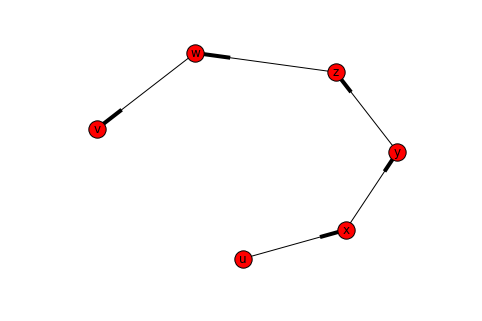

In [347]:
T = nx.dfs_tree(G,'u')
nx.draw(T, with_labels=True)
plt.show()

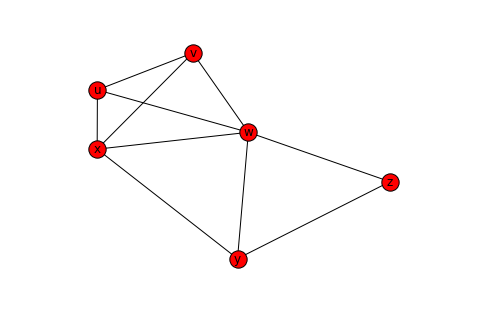

In [98]:
nx.draw(G, with_labels =True)
plt.show()

In [99]:
nx.dfs_edges(G)

<generator object dfs_edges at 0x1037c1320>

In [108]:
nx.dfs_predecessors(G)

{'v': 'w', 'w': 'z', 'x': 'u', 'y': 'x', 'z': 'y'}

In [104]:
nx.dfs_predecessors(G,'u')

{'v': 'w', 'w': 'z', 'x': 'u', 'y': 'x', 'z': 'y'}

In [105]:
nx.dfs_predecessors(G,'x')

{'u': 'w', 'v': 'u', 'w': 'z', 'y': 'x', 'z': 'y'}

In [250]:
dijkstra(dfs, dfs.getVertex('u'))

AttributeError: 'NoneType' object has no attribute 'setDistance'

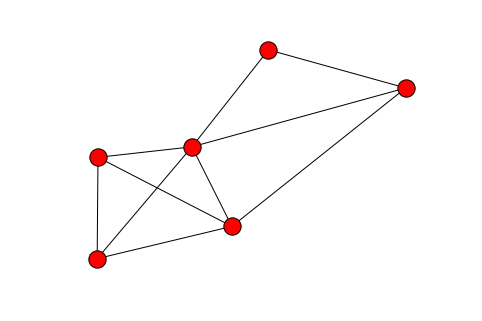

In [103]:
nx.draw(G)
plt.show()

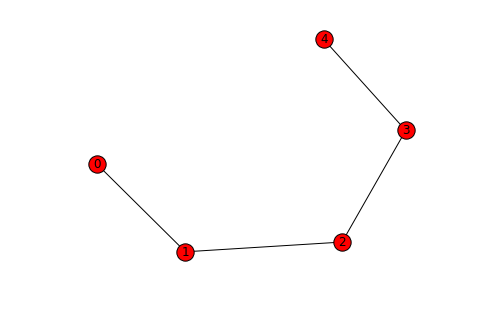

In [145]:
G2 = nx.path_graph(5)
nx.draw(G2, with_labels =True)
plt.show()

In [146]:
list(nx.dfs_edges(G2, source=4))

[(4, 3), (3, 2), (2, 1), (1, 0)]

In [148]:
list(nx.dfs_edges(G, source='u'))

[('u', 'x'), ('x', 'y'), ('y', 'z'), ('z', 'w'), ('w', 'v')]

In [156]:
T = nx.dfs_tree(G, source='u')
T.edges()


[('u', 'x'), ('w', 'v'), ('y', 'z'), ('x', 'y'), ('z', 'w')]

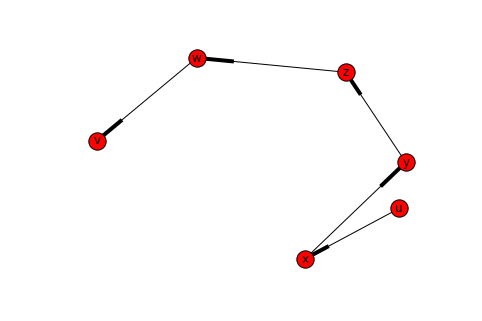

In [157]:
nx.draw(T, with_labels =True)
plt.show()

In [159]:
nx.dfs_predecessors(G, source='u')

{'v': 'w', 'w': 'z', 'x': 'u', 'y': 'x', 'z': 'y'}

In [160]:
nx.dfs_successors(G, source='u')

{'u': ['x'], 'w': ['v'], 'x': ['y'], 'y': ['z'], 'z': ['w']}

In [161]:
def dfs_mann(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited


In [187]:
dfs(G3,'A')

AttributeError: DFSGraph instance has no __call__ method

In [181]:
G3 = nx.Graph()

G3.add_node('A')
G3.add_node('C')
G3.add_node('B')
G3.add_node('D')
G3.add_node('E')
G3.add_node('F')

G3.add_edge('A','D')
G3.add_edge('A','B')
G3.add_edge('B','C')
G3.add_edge('B','D')
G3.add_edge('D','E')
G3.add_edge('E','B')
G3.add_edge('E','F')
G3.add_edge('F','C')

In [182]:
list(nx.dfs_edges(G3,'A'))

[('A', 'B'), ('B', 'C'), ('C', 'F'), ('F', 'E'), ('E', 'D')]

In [183]:
nx.dfs_successors(G3,'A')

{'A': ['B'], 'B': ['C'], 'C': ['F'], 'E': ['D'], 'F': ['E']}

In [186]:
T3 = nx.dfs_tree(G3, source='A')
T3.edges()

[('A', 'B'), ('C', 'F'), ('B', 'C'), ('E', 'D'), ('F', 'E')]

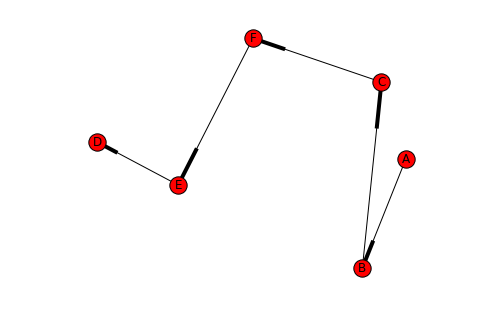

In [184]:
nx.draw(T3, with_labels=True)
plt.show()

In [224]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def Dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

Dfs(graph, 'D')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [425]:
def prim(G,start):
    pq = PriorityQueue()
    for v in G:
        v.setDistance(sys.maxsize)
        v.setPred(None)
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in G])
    orders = []
    while not pq.isEmpty():
        currentVert = pq.delMin()
        orders = orders + [currentVert.id]
        for nextVert in currentVert.getConnections():
            newCost = currentVert.getWeight(nextVert)
            if nextVert in pq and newCost<nextVert.getDistance():
                nextVert.setPred(currentVert)
                nextVert.setDistance(newCost)
                pq.decreaseKey(nextVert,newCost)
    return orders


In [426]:
G= Graph()
G.addVertex('A')
G.addVertex('B')
G.addVertex('C')
G.addVertex('D')
G.addVertex('E')
G.addVertex('F')
G.addVertex('G')


G.addEdge('A','B', 2)
G.addEdge('A','C', 3)
G.addEdge('B','C', 1)
G.addEdge('B','D', 1)
G.addEdge('B','E', 4)
G.addEdge('C','F', 1)
G.addEdge('D','E', 1)
G.addEdge('E','F', 1)
G.addEdge('F','G', 1)
prim(G,G.getVertex('A'))

['A', 'B', 'C', 'D', 'F', 'E', 'G']